In [1]:
#필요 라이브러리
import pandas as pd
import numpy as np

#################### Train_Test Split ######################
from sklearn.model_selection import train_test_split


#################### 성능평가 ############################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import sklearn
#################### XGBoost ###########################
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV


################## lgbm ###########################
from lightgbm import LGBMClassifier

##################### Decision Tree #######################
from sklearn.tree import DecisionTreeClassifier

################## RandomForest ##########################
from sklearn.ensemble import RandomForestClassifier

###################### Logistic Rregression ###############
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [48]:
#모델 성능 평가 함수화
def model_assessment(test,pred):
    confusion = confusion_matrix(test, pred)
    accuracy = accuracy_score(test,pred)
    report = metrics.classification_report(test, pred, digits=2)
    
    print('accuracy', accuracy, '\n')
    print('confusion_matrix',confusion, '\n')
    print(report)

In [3]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
df_m = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/data/PCA30.csv')

In [6]:
df_m.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,연체여부
0,0,-204850.823344,52770.958635,-51743.899750,-74094.166196,21946.601952,-23300.911088,23727.231274,-30247.425045,-23103.044105,7408.619239,-11950.476054,-3.860570e+02,6550.546304,-1809.734470,12354.730538,-1765.532818,-913.911833,-4753.598141,-311.099730,158.886880,-252.534827,-33.843553,110.590546,-27.056662,-5.557922,-7.437375,8.504220,-0.939240,13.948135,-2.563740,0
1,1,405653.596412,-815190.314707,-72709.247512,-90350.879616,-9774.509547,-26803.618728,-97785.375838,9020.939667,29321.470960,-28361.754998,108151.816143,1.020552e+06,-27163.089526,-6517.407241,-15006.637866,-4371.368695,6926.029616,-4166.695129,2801.330307,-423.509777,-880.516877,-72.555617,17.599610,1.885057,-0.295097,4.397181,2.849485,5.051407,-2.122153,-2.285249,0
2,2,-206097.271223,56087.951247,-46743.977038,-74829.805697,22286.637301,-25915.054240,-15540.751157,-25132.762138,-20575.290769,2169.965587,-9793.305821,-7.871127e+02,6383.290653,-2101.591028,-3581.170802,-1762.940374,-798.431056,2178.362168,-123.843000,194.559192,-210.008512,-90.216539,-12.022320,-0.424581,2.132270,-0.896373,0.283040,1.422797,0.794404,-4.145374,0
3,3,-206110.538085,56100.026684,-52058.258223,-75115.582657,22935.645070,-25833.536815,-15445.108655,-24569.240560,-20111.362077,6878.747350,-10112.348676,-6.988443e+02,6155.257574,-2069.970064,-3615.590460,-1741.241595,-705.336052,-4630.199739,-115.199268,166.597346,-211.383901,-29.039198,-11.902679,-0.489280,2.116021,-0.737978,0.236348,1.330976,0.209992,0.537108,0
4,4,-198057.263585,36578.193179,549811.023693,-30953.314153,354887.688086,-42251.653508,-20923.867118,-77387.953170,-45056.072223,-90459.010687,-11004.365178,4.307013e+02,4776.089993,-2402.400549,-6734.460703,-483.816600,636.169325,-10300.849400,-744.716016,-356.222335,-1024.813899,-14.740073,-12.506657,-0.820884,1.473628,-0.811703,0.283161,0.872398,0.755613,-6.354285,0


In [7]:
df_m.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
len(df_m.columns)

31

# 1. Train - Test Split

해당 데이터에서 정상인 케이스 비율이 전체의 약 99.65%, 채무불이행(연체)가 약 0.35%임

In [9]:
df_m['연체여부'].value_counts() / df_m['연체여부'].value_counts().sum() *100

0    99.647121
1     0.352879
Name: 연체여부, dtype: float64

In [10]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

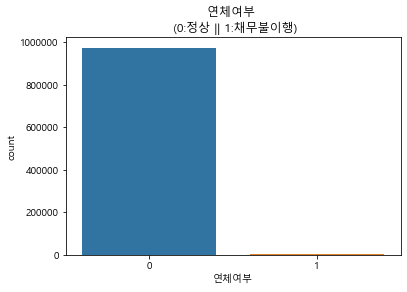

In [11]:
sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

In [12]:
#독립변수
X = df_m.drop(columns=['연체여부'])
y = df_m['연체여부']

* Random State seed 주는 것 보류

In [13]:
#stratify = y는 클래스 비율을 유지 즉 위의 0: 97.53 %  || 1: 2.47% 비율을 Train-Test에도 동일 적용

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=156)
print(X_train.shape, X_test.shape)

(684173, 30) (293217, 30)


In [14]:
y_train.value_counts() / y_train.value_counts().sum() *100

0    99.647165
1     0.352835
Name: 연체여부, dtype: float64

In [15]:
y_test.value_counts() / y_test.value_counts().sum() *100

0    99.647019
1     0.352981
Name: 연체여부, dtype: float64

In [16]:
#.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_test.csv')

In [17]:
#y_test.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_test.csv')

In [18]:



#X_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_train.csv')

In [19]:
#y_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_train.csv')

In [20]:
X_train.shape

(684173, 30)

In [21]:

X_test.shape

(293217, 30)

In [22]:
y_train.shape

(684173,)

In [23]:
y_test.shape

(293217,)

## 3. SMOTE OverSampling

Train Data Set에 대하여 Smote OverSampling 실행

원래 아이디어는 smote -> undersampling 해서 모델링 시간을 줄이려했지만...

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7) # RandomState 변경
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [25]:
print('SMOTE 적용 후 Data Set Size', X_train_over.shape, y_train_over.shape)

SMOTE 적용 후 Data Set Size (1363518, 30) (1363518,)


In [26]:
print('SMOTE 적용 후 Class 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 후 Class 분포:
 1    681759
0    681759
Name: 연체여부, dtype: int64


Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

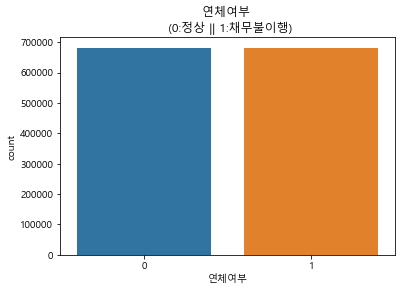

In [27]:
sns.countplot('연체여부', data = y_train_over.to_frame())
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

# Modelling

In [28]:
def auc_return(y_test, pred):
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test,pred)
    auc = metrics.auc(fpr,tpr)
    return auc

# 1. Regression

전통적으로 채무불이행 예측 모델은 다음과 같은 기본 알고리즘을 많이 사용함. 그 이유는 채무불이행 이유에 대한 '설명가능성'이 있기 때문 <br>
보수적인 금융권 특성, 고객과의 신뢰 등을 이유로 알고리즘의 설명 가능성에 대해 매우 민감함 <br>

## 1-1) Logistic

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train_over,y_train_over)

LogisticRegression()

In [32]:
lr_pred = lr.predict(X_test)

In [33]:
model_assessment(y_test, lr_pred)

accuracy 0.27891970792962206 

confusion_matrix [[ 80865 211317]
 [   116    919]] 

              precision    recall  f1-score   support

           0       1.00      0.28      0.43    292182
           1       0.00      0.89      0.01      1035

    accuracy                           0.28    293217
   macro avg       0.50      0.58      0.22    293217
weighted avg       1.00      0.28      0.43    293217



In [34]:
auc = auc_return(y_test,lr_pred) # 변경
print(auc)

0.5823425671055334


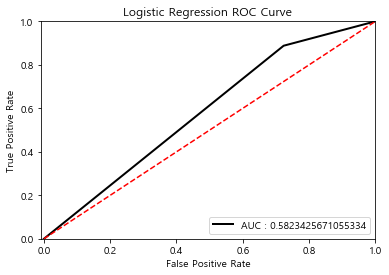

In [128]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, lr_pred)
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/png/Logistic Regression ROC.png')
plt.show()

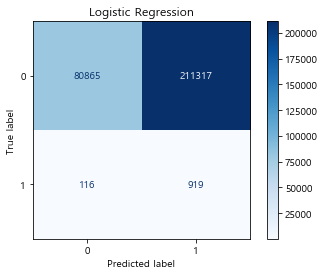

In [129]:
plot_confusion_matrix(lr,X_test,y_test,cmap='Blues')

plt.title('Logistic Regression')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/png/Logistic Regression Confusion Matrix.png')
plt.show()

In [132]:
#모델저장
import pickle as pkl
with open("lr_model.pkl",'wb') as outfile:
    pkl.dump(lr,outfile)

In [133]:
#모델저장
import pickle as pkl
with open("lr_predict.pkl",'wb') as outfile:
    pkl.dump(lr_pred,outfile)

# 2. Classification

### 2-1) XGBOOST

In [134]:
#X_test.head()

In [35]:
######기본모델
xgb_over_model = XGBClassifier(n_estimators=100,
                              objective='binary:logistic',
                              seed=156,
                              learning_rate=0.01)
xgb_over_model.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.68962	validation_1-logloss:0.68881
[1]	validation_0-logloss:0.68427	validation_1-logloss:0.68491
[2]	validation_0-logloss:0.68105	validation_1-logloss:0.68109
[3]	validation_0-logloss:0.67657	validation_1-logloss:0.67738
[4]	validation_0-logloss:0.67337	validation_1-logloss:0.67334
[5]	validation_0-logloss:0.66935	validation_1-logloss:0.66981
[6]	validation_0-logloss:0.66554	validation_1-logloss:0.66614
[7]	validation_0-logloss:0.66210	validation_1-logloss:0.66242
[8]	validation_0-logloss:0.65821	validation_1-logloss:0.65888
[9]	validation_0-logloss:0.65492	validation_1-logloss:0.65522
[10]	validation_0-logloss:0.65232	validation_1-logloss:0.65170
[11]	validation_0-logloss:0.64731	validation_1-logloss:0.64853
[12]	validation_0-logloss:0.64490	validation_1-logloss:0.64516
[13]	validation_0-logloss:0.64107	validation_1-logloss:0.64207
[14]	validation_0-logloss:0.63826	validation_1-logloss:0.63887
[15]	validation_0-logloss:0.63558	validation_1-logloss:0.63573
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=156,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
xgb_over_pred = xgb_over_model.predict(X_test)

In [42]:
#모델저장
import pickle as pkl
with open("xgb_model.pkl",'wb') as outfile:
    pkl.dump(xgb_over_model,outfile)

In [43]:
#모델저장
import pickle as pkl
with open("xgb_pred.pkl",'wb') as outfile:
    pkl.dump(xgb_over_pred,outfile)

In [44]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.7572446345198266 

confusion_matrix [[221253  70929]
 [   251    784]] 

              precision    recall  f1-score   support

           0       1.00      0.76      0.86    292182
           1       0.01      0.76      0.02      1035

    accuracy                           0.76    293217
   macro avg       0.50      0.76      0.44    293217
weighted avg       1.00      0.76      0.86    293217



In [49]:
auc = auc_return(y_test,xgb_over_pred) # 변경
print(auc)

0.7573658477111597


In [50]:
auc = auc.round(2)

In [51]:
auc

0.76

In [ ]:
import pickle as pkl
with open('Logistc_Regression_predict.pkl','rb') as infile:
    lr_pred = pkl.load(infile)

In [140]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.7572446345198266 

confusion_matrix [[221253  70929]
 [   251    784]] 

              precision    recall  f1-score   support

           0       1.00      0.76      0.86    292182
           1       0.01      0.76      0.02      1035

    accuracy                           0.76    293217
   macro avg       0.50      0.76      0.44    293217
weighted avg       1.00      0.76      0.86    293217



In [145]:
auc = auc_return(y_test,xgb_over_pred) # 변경
print(auc)

0.7573658477111597


In [ ]:
auc = auc.round(2)

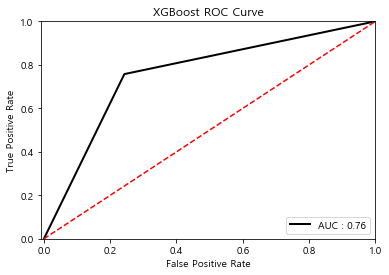

In [52]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/png/XGBoost ROC.png')
plt.show()

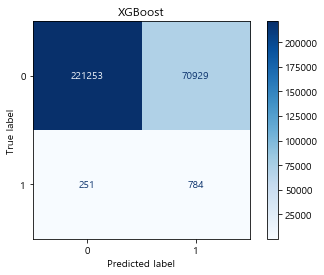

In [166]:
plot_confusion_matrix(xgb_over_model,X_test,y_test,cmap='Blues') #변경

plt.title('XGBoost')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/png/XGBoost.png')
plt.show()

In [146]:
#모델저장
import pickle as pkl
with open("xgb_model.pkl",'wb') as outfile:
    pkl.dump(xgb_over_model,outfile)

In [147]:
#모델저장
import pickle as pkl
with open("xgb_pred.pkl",'wb') as outfile:
    pkl.dump(xgb_over_pred,outfile)

In [152]:
xgb_over_model.feature_importances_

array([0.01376428, 0.01622987, 0.0121608 , 0.01221835, 0.01151292,
       0.01046943, 0.00877993, 0.00740303, 0.05769215, 0.0048074 ,
       0.07760459, 0.00653696, 0.0627437 , 0.10303892, 0.0077408 ,
       0.01269508, 0.01368533, 0.01510934, 0.01761113, 0.01840958,
       0.01100989, 0.02337754, 0.25674343, 0.00826548, 0.01811425,
       0.13831283, 0.01643006, 0.01222799, 0.0175673 , 0.00773765],
      dtype=float32)

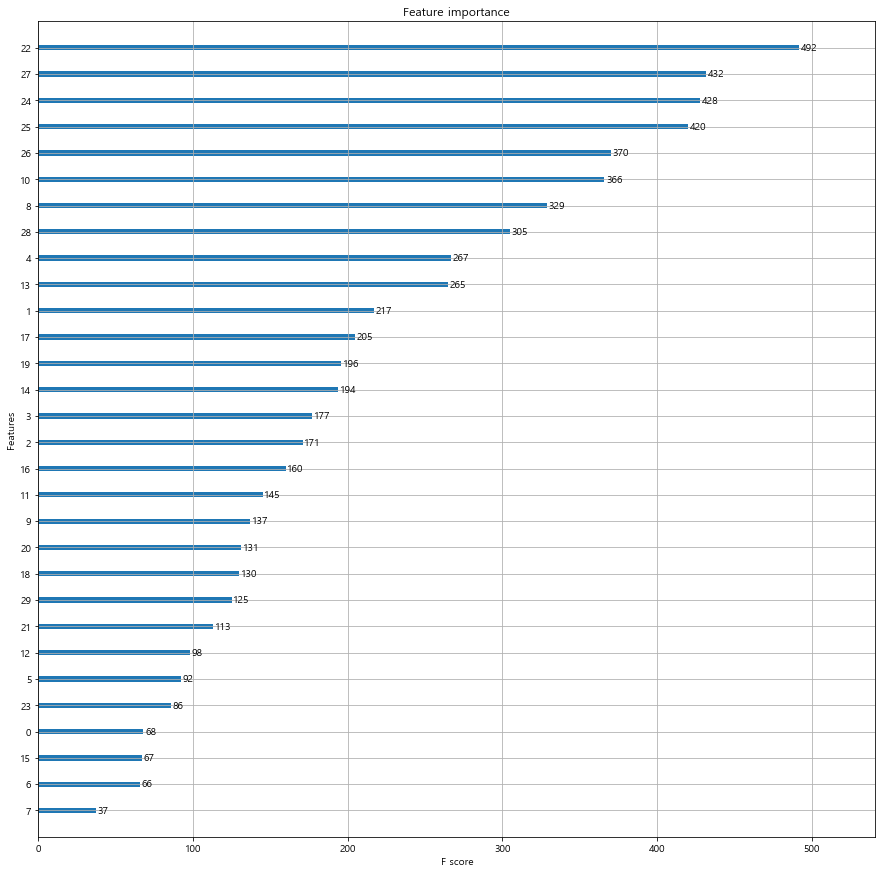

In [149]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_over_model.get_booster(), ax=ax)

## 2) LightGBM

In [53]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100)

In [54]:
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[1]	training's binary_logloss: 0.65467	valid_1's binary_logloss: 0.655142
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.622534	valid_1's binary_logloss: 0.624018
[3]	training's binary_logloss: 0.595957	valid_1's binary_logloss: 0.598848
[4]	training's binary_logloss: 0.573456	valid_1's binary_logloss: 0.577874
[5]	training's binary_logloss: 0.554493	valid_1's binary_logloss: 0.560667
[6]	training's binary_logloss: 0.537524	valid_1's binary_logloss: 0.545147
[7]	training's binary_logloss: 0.523102	valid_1's binary_logloss: 0.532213
[8]	training's binary_logloss: 0.51049	valid_1's binary_logloss: 0.521145
[9]	training's binary_logloss: 0.499443	valid_1's binary_logloss: 0.511533
[10]	training's binary_logloss: 0.489927	valid_1's binary_logloss: 0.50338
[11]	training's binary_logloss: 0.481579	valid_1's binary_logloss: 0.496179
[12]	training's binary_logloss: 0.474261	valid_1's binary_logloss: 0.490121
[13]	training's binary_logloss: 0.46771

LGBMClassifier()

In [55]:
lgbm_pred = lgbm.predict(X_test)

In [56]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.7901758765692303 

confusion_matrix [[230942  61240]
 [   284    751]] 

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    292182
           1       0.01      0.73      0.02      1035

    accuracy                           0.79    293217
   macro avg       0.51      0.76      0.45    293217
weighted avg       1.00      0.79      0.88    293217



In [57]:
auc = auc_return(y_test,xgb_over_pred) # 변경
print(auc)

0.7573658477111597


In [58]:
auc = auc.round(2)

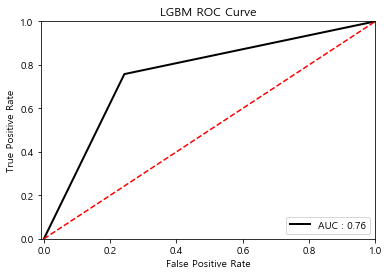

In [59]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('LGBM ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/png/lgbm ROC.png')
plt.show()

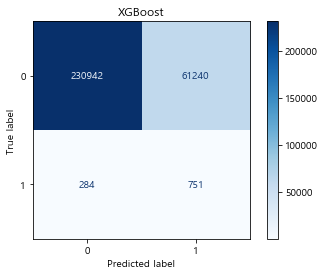

In [165]:
plot_confusion_matrix(lgbm,X_test,y_test,cmap='Blues')

plt.title('XGBoost')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오2/png/LGBM.png')
plt.show()

In [161]:
#모델저장
import pickle as pkl
with open("lgbm_model",'wb') as outfile:
    pkl.dump(lgbm,outfile)

In [162]:
#모델저장
import pickle as pkl
with open("lgbm_pred",'wb') as outfile:
    pkl.dump(lgbm_pred,outfile)

## 3) RandomForest

In [29]:
rfc = RandomForestClassifier(n_estimators=100, random_state=146)
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=146)

In [30]:
rfc_prd = rfc.predict(X_test)

In [40]:
print('<OverSampling 후 RandomForest 기본 모델 성능>')

model_assessment(y_test,rfc_prd)

<OverSampling 후 RandomForest 기본 모델 성능>
accuracy 0.9834388865584192 

confusion_matrix [[288311   3871]
 [   985     50]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292182
           1       0.01      0.05      0.02      1035

    accuracy                           0.98    293217
   macro avg       0.50      0.52      0.51    293217
weighted avg       0.99      0.98      0.99    293217



In [31]:
#모델저장
import pickle as pkl
with open("rf.pkl",'wb') as outfile:
    pkl.dump(rfc,outfile)

In [32]:
#모델저장
import pickle as pkl
with open("rf.predict",'wb') as outfile:
    pkl.dump(rfc_prd,outfile)

In [33]:
auc = auc_return(y_test,rfc_prd) # 변경
print(auc)

0.5175302935563589


0.5175302935563589


## 4) Decision Tree

In [34]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_over, y_train_over)

In [35]:
dt_pred = dt.predict(X_test)

In [36]:
print('<OverSampling 후 Decision Tree 기본 모델 성능>')

model_assessment(y_test,dt_pred)

<OverSampling 후 Decision Tree 기본 모델 성능>
accuracy 0.9670482952898365 

confusion_matrix [[283445   8737]
 [   925    110]] 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    292182
           1       0.01      0.11      0.02      1035

    accuracy                           0.97    293217
   macro avg       0.50      0.54      0.50    293217
weighted avg       0.99      0.97      0.98    293217



In [37]:
#모델저장
import pickle as pkl
with open("dt.pkl",'wb') as outfile: ################
    pkl.dump(dt,outfile) ################

In [38]:
#모델저장
import pickle as pkl
with open("dt_predict.pkl",'wb') as outfile: ################
    pkl.dump(dt_pred,outfile) ################

In [39]:
auc = auc_return(y_test,dt_pred) # 변경
print(auc)

0.5381887991393889


## 5) Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21,max_depth = 5)
gbc.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_depth=5, random_state=21)

In [45]:
gbc_pred = gbc.predict(X_test)

In [46]:
print('Gradient Boosting 기본 모델 성능')

model_assessment(y_test,gbc_pred)

Gradient Boosting 기본 모델 성능
accuracy 0.7902816003164892 

confusion_matrix [[230987  61195]
 [   298    737]] 

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    292182
           1       0.01      0.71      0.02      1035

    accuracy                           0.79    293217
   macro avg       0.51      0.75      0.45    293217
weighted avg       1.00      0.79      0.88    293217



In [48]:
auc = auc_return(y_test,gbc_pred) # 변경
print(auc)

0.7513179595525085


In [50]:
#모델저장
import pickle as pkl
with open("gbc_model",'wb') as outfile:
    pkl.dump(gbc,outfile)

In [51]:
#모델저장
import pickle as pkl
with open("gbc_predict",'wb') as outfile:
    pkl.dump(gbc_pred,outfile)

## 5) CatBoost